In [93]:
import pandas as pd
import numpy as np
import random
from datetime import date
import matplotlib.pyplot as plt
%matplotlib inline

Customer_ID fornmat - 9236-XXX -> This is only for this datset as orders are 597.

In [11]:
df = pd.read_excel('flipkart data/Customer data 1.xlsx', sheet_name='Orders', skiprows= 1 )
df.head()

,Due Date,Settlement Value \n= SUM(F:O),Unnamed: 2,Order ID,Order item ID,Sale Amount,Total Offer Amount,My Share,Customer Shipping Amount,Marketplace Fee (Rs.),...,Seller Dead Weight,Length*Breadth*Height,Volumetric Weight(In Kgs),Chargeable Weight Type,Chargeable Wt. Slab (In Kgs),Shipping Zone,Unnamed: 63,ID,Date,Amount
0,2020-07-27,-291.716,NaN,OD119141143816135000,11914114381613500,0,0,0,0,-12.78,...,0.20,8.000*6.000*8.000,0.077,NaN,NaN,National,NaN,FADB1A2100002323,2020-07-13T04:05:20+05:30,279.0
1,2020-08-03,0.000,NaN,OD119206382709689000,11920638270968900,0,40,-40,0,0.00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,FADB1A2100002868,2020-07-21T05:48:32+05:30,331.0
2,2020-08-05,233.488,NaN,OD119211138251171000,11921113825117100,404,0,0,0,-141.60,...,0.20,7.000*6.000*7.500,0.063,Dead,0.0-0.5,National,NaN,FAAC122100000539,2020-07-22T19:20:24+05:30,404.0
3,2020-08-08,187.937,NaN,OD119246733334912000,11924673333491200,322,0,0,0,-111.30,...,0.20,7.000*5.500*7.500,0.058,Dead,0.0-0.5,Local,NaN,FADB1A2100003208,2020-07-26T04:11:15+05:30,322.0
4,2020-08-03,168.543,NaN,OD119199078923961000,11919907892396100,299,40,0,0,-142.02,...,0.18,8.000*6.000*8.000,0.077,Dead,0.0-0.5,National,NaN,FADB1A2100002807,2020-07-20T06:00:45+05:30,299.0


In [12]:
Customer_id = list()

for i in range(0,597):
    Customer_id.append(random.randrange(9236000, 9236200))
                       
# print(Customer_id)
print(len(Customer_id))


597


In [15]:
#Do not run again

df['Customer ID'] = Customer_id
df = df[['Customer ID','Seller SKU','Order Date','Dispatch Date','Return Type','Amount']]
df = df.rename(columns={'Seller SKU': 'Product ID'})
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Dispatch Date'] = pd.to_datetime(df['Dispatch Date'])
df['Difference'] = df['Dispatch Date'].sub(df['Order Date'], axis=0)
df['Difference'] = df['Difference'] / np.timedelta64(1, 'D')
# df.head()

In [85]:
df = df[['Customer ID','Product ID','Return Type','Amount','Difference']]
df['Return Type'] = df['Return Type'].replace({"Courier Return": "Customer Return"})
df.head()

,Customer ID,Product ID,Return Type,Amount,Difference
0,9236108,XB-2231,Customer Return,279.0,2.0
1,9236082,HMTS-S9020,NaN,331.0,2.0
2,9236134,HMTS-B9037,NaN,404.0,4.0
3,9236177,X-6004,NaN,322.0,4.0
4,9236061,XDD-7034,NaN,299.0,3.0


ValueError: x and y must have same first dimension, but have shapes (597,) and (1,)

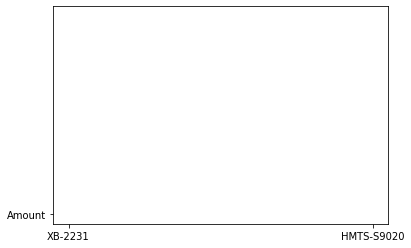

In [94]:
plt.plot(df['Product ID'], ['Amount'])

In [36]:
test = list()
test = df['Product ID'] #rating
# print(list(test))
test = list(test)
x = np.array(list(test))
print(np.unique(x))
print(np.unique(x).shape)
rate1 = np.unique(x)

['AXE-1143NL01' 'C007' 'C022' 'C029' 'C031' 'C035' 'C041' 'HM-GB9006'
 'HM-GG9008' 'HM-GG9010' 'HM-GG9013' 'HM-GG9501' 'HM-GS9005' 'HM-SB9002'
 'HM-SB9003' 'HMTB-TT9028' 'HMTG-G9011' 'HMTG-G9014' 'HMTG-G9016'
 'HMTG-TT9009' 'HMTG-TT9018' 'HMTG-TT9019' 'HMTG-TT9033' 'HMTS-B9022'
 'HMTS-B9023' 'HMTS-B9024' 'HMTS-B9035' 'HMTS-B9036' 'HMTS-B9037'
 'HMTS-S9020' 'HMTS-S9021' 'X-1116SL01' 'X-1121' 'X-1201' 'X-1203'
 'X-2116' 'X-2231' 'X-2257' 'X-2258' 'X-2261' 'X-2265' 'X-2266' 'X-2269'
 'X-2270' 'X-2273' 'X-2276' 'X-2277' 'X-2280' 'X-2283' 'X-2285' 'X-2286'
 'X-2287' 'X-2290' 'X-2291' 'X-2292' 'X-2293' 'X-3003' 'X-3005' 'X-6001'
 'X-6004' 'X-6005' 'X-6006' 'X-6008' 'X-6009' 'X-6010' 'X-6011' 'X-6015'
 'X-6019' 'X-6027' 'X-6055' 'X-7003' 'X-7053' 'X1115SM01' 'X1115SM02'
 'X1158MS-Black' 'X1165KL01' 'X1182MS-Black' 'X2114SM01' 'X2251'
 'X3503WWS' 'X6001' 'XB-2231' 'XB-2262' 'XDD-1028' 'XDD-7013' 'XDD-7018'
 'XDD-7019' 'XDD-7031' 'XDD-7032' 'XDD-7034' 'XDD-7035' 'XDD-7036'
 'XDD-7039' 'XDD-7040

In [35]:
rate2 = list()
for i in rate1:
    rate2.append(round(random.uniform(1.5, 4.8),1))
print(rate2)
print(rate1)

[2.2, 4.2, 4.5, 2.5, 1.8, 3.9, 2.3, 2.0, 4.2, 1.8, 4.2, 1.7, 3.3, 2.4, 4.7, 3.7, 2.7, 4.6, 4.4, 2.4, 4.2, 4.7, 3.0, 4.6, 3.5, 3.1, 2.0, 1.9, 4.1, 1.5, 3.8, 4.4, 3.1, 1.9, 3.9, 2.6, 3.4, 3.1, 1.6, 2.1, 2.4, 3.9, 4.4, 2.2, 2.2, 2.6, 2.2, 1.6, 4.3, 2.8, 3.4, 3.2, 3.2, 4.1, 4.3, 1.8, 1.8, 3.7, 3.9, 4.3, 3.8, 3.9, 2.6, 4.3, 4.4, 4.1, 3.2, 2.3, 4.2, 4.4, 4.7, 3.2, 1.9, 4.5, 2.1, 2.0, 1.7, 2.1, 2.7, 1.6, 3.7, 3.8, 2.4, 3.6, 3.5, 3.8, 4.2, 2.3, 2.4, 4.1, 2.7, 3.5, 2.1, 1.9, 4.3, 1.8, 3.5, 2.9, 4.8, 3.9, 2.1, 2.8, 3.1, 3.6, 4.7, 4.7, 4.2, 3.1, 2.8, 2.8, 1.6]
['AXE-1143NL01' 'C007' 'C022' 'C029' 'C031' 'C035' 'C041' 'HM-GB9006'
 'HM-GG9008' 'HM-GG9010' 'HM-GG9013' 'HM-GG9501' 'HM-GS9005' 'HM-SB9002'
 'HM-SB9003' 'HMTB-TT9028' 'HMTG-G9011' 'HMTG-G9014' 'HMTG-G9016'
 'HMTG-TT9009' 'HMTG-TT9018' 'HMTG-TT9019' 'HMTG-TT9033' 'HMTS-B9022'
 'HMTS-B9023' 'HMTS-B9024' 'HMTS-B9035' 'HMTS-B9036' 'HMTS-B9037'
 'HMTS-S9020' 'HMTS-S9021' 'X-1116SL01' 'X-1121' 'X-1201' 'X-1203'
 'X-2116' 'X-2231' 'X-2257' 'X-2

In [45]:
#You have three arrays : rate1,rate2,rating 
# rating = list()
# for i in (0,len(rate1)):
#     for j in range(0,len(test)):
#         if test[j]== rate1[i]:
#             rating[j]=rate2[i]
# print(rating)

In [95]:
dic = dict()
for i in range(len(rate1)):
    dic[i] = {rate1[i]:rate2[i]}

choice = dic
dic2 = dict()
for i in range(len(test)):
    dic2[i] = random.choice(dic)
print(dic2)
# test.type()
# print(dic)

{0: {'X1158MS-Black': 2.1}, 1: {'X-6015': 3.2}, 2: {'XDD-7043': 1.8}, 3: {'X-2277': 2.2}, 4: {'C031': 1.8}, 5: {'HM-GG9501': 1.7}, 6: {'XDD-7032': 2.4}, 7: {'X-1201': 1.9}, 8: {'XDD-7073': 4.2}, 9: {'XDD-7070': 3.6}, 10: {'X-1116SL01': 4.4}, 11: {'HMTG-TT9033': 3.0}, 12: {'X-6008': 2.6}, 13: {'XDD-7057': 3.9}, 14: {'HM-GG9501': 1.7}, 15: {'X-6010': 4.4}, 16: {'X-2265': 2.4}, 17: {'X-2287': 3.2}, 18: {'X-3003': 1.8}, 19: {'XB-2262': 2.4}, 20: {'X-2283': 4.3}, 21: {'X-2116': 2.6}, 22: {'XDD-7039': 2.1}, 23: {'XDD-7073': 4.2}, 24: {'XDD-7044': 3.5}, 25: {'HMTS-S9020': 1.5}, 26: {'X-2258': 1.6}, 27: {'X-2286': 3.4}, 28: {'X-2286': 3.4}, 29: {'XDD-7034': 4.1}, 30: {'X-6006': 3.9}, 31: {'HMTS-S9021': 3.8}, 32: {'X-6015': 3.2}, 33: {'XDD-7072': 4.7}, 34: {'XB-2231': 3.8}, 35: {'X1158MS-Black': 2.1}, 36: {'X-2293': 1.8}, 37: {'HMTS-B9035': 2.0}, 38: {'X-3005': 3.7}, 39: {'HMTS-B9035': 2.0}, 40: {'XDD-7032': 2.4}, 41: {'HM-GG9013': 4.2}, 42: {'HM-SB9003': 4.7}, 43: {'HM-GG9501': 1.7}, 44: {'X-2

In [73]:
data_ = pd.DataFrame.from_dict(dic2)
data_

,0,1,2,3,4,5,6,7,8,9,...,587,588,589,590,591,592,593,594,595,596
HMTB-TT9028,3.7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
C022,NaN,4.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X-6019,NaN,NaN,2.3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HMTS-B9022,NaN,NaN,NaN,4.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XB-2262,NaN,NaN,NaN,NaN,2.4,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
X-6008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
X-6015,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AXE-1143NL01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
XDD-7065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
